In [1]:
import pandas as pd
import numpy as np

In [2]:
lagos_working = pd.read_excel(r'C:\Users\mohit\OneDrive\Desktop\lagos-chapter-water-availability\src\data\raw_data\LAGOS_Working.xlsx')

In [3]:
lagos_working.head()

,row_id,#source,#lat_deg,#lon_deg,#report_date,#status_id,#water_source,#water_source_clean,#water_tech_clean,#water_tech,...,#subjective_quality,#notes,#photo_lnk,water_tech_original,water_source_original,management_clean,management_original,water_source_category,water_tech_category,count
0,185053,"Federal Ministry of Water Resources, Nigeria",6.601190,3.394098,2015-05-16,Yes,Improved Protected dug well,Protected Shallow Well,Mechanized Pump,Motorised,...,Acceptable quality,Kosofe senior sch.kosofe,https://akvoflow-55.s3.amazonaws.com/images/38...,motorised,improved protected dug well,Direct Government Operation,direct government operation,Well,Mechanized Pump,1
1,185368,"Federal Ministry of Water Resources, Nigeria",6.674977,3.712242,2015-05-29,Yes,Improved Protected dug well,Protected Spring,NaN,Gravity,...,Acceptable quality,"U P E Primary School,Shagamu road,Odo Ayandelu...",https://akvoflow-55.s3.amazonaws.com/images/fd...,NaN,gravity,School Management,institutional management - school,Spring,NaN,1
2,185381,"Federal Ministry of Water Resources, Nigeria",6.413153,4.087083,2015-06-08,No,Improved Tube well or borehole,Borehole,Mechanized Pump,Motorised,...,Acceptable quality,Osoroko,https://akvoflow-55.s3.amazonaws.com/images/2c...,motorised,improved tube well or borehole,NaN,NaN,Well,Mechanized Pump,1
3,185740,"Federal Ministry of Water Resources, Nigeria",6.583227,3.981810,2015-05-27,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,Motorised,...,Acceptable quality,Araromi market.,https://akvoflow-55.s3.amazonaws.com/images/62...,motorised,improved tube well or borehole,Other,other,Well,Mechanized Pump,1
4,185627,"Federal Ministry of Water Resources, Nigeria",6.630905,3.986448,2015-05-31,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,Motorised,...,Acceptable quality,Naforija.Eredo Road.,https://akvoflow-55.s3.amazonaws.com/images/0c...,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

def profiling_report(df):
    # !pip install pandas-profiling
    from pandas_profiling import ProfileReport
    ProfileReport(df)
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

    #helps to make a full report
    profiling_report(df)

In [5]:
lagos_working.describe()

,row_id,#lat_deg,#lon_deg,count
count,1506.000000,1506.000000,1506.000000,1506.0
mean,185606.411687,6.554272,3.434240,1.0
std,436.173758,0.083918,0.319509,0.0
min,184850.000000,6.378428,2.706829,1.0
25%,185229.250000,6.483650,3.278200,1.0
50%,185607.500000,6.575044,3.351481,1.0
75%,185983.750000,6.622295,3.617965,1.0
max,186360.000000,6.694335,4.167322,1.0


In [6]:
lagos_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   row_id                 1506 non-null   int64         
 1   #source                1506 non-null   object        
 2   #lat_deg               1506 non-null   float64       
 3   #lon_deg               1506 non-null   float64       
 4   #report_date           1506 non-null   datetime64[ns]
 5   #status_id             1506 non-null   object        
 6   #water_source          1506 non-null   object        
 7   #water_source_clean    1506 non-null   object        
 8   #water_tech_clean      1454 non-null   object        
 9   #water_tech            1506 non-null   object        
 10  #facility_type         1506 non-null   object        
 11  #adm2                  1506 non-null   object        
 12  #management            1036 non-null   object        
 13  #pa


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
row_id,1506.0,185606.411687,436.173758,184850.000000,185229.25000,185607.500000,185983.750000,186360.000000
#lat_deg,1506.0,6.554272,0.083918,6.378428,6.48365,6.575044,6.622295,6.694335
#lon_deg,1506.0,3.434240,0.319509,2.706829,3.27820,3.351481,3.617965,4.167322
count,1506.0,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000


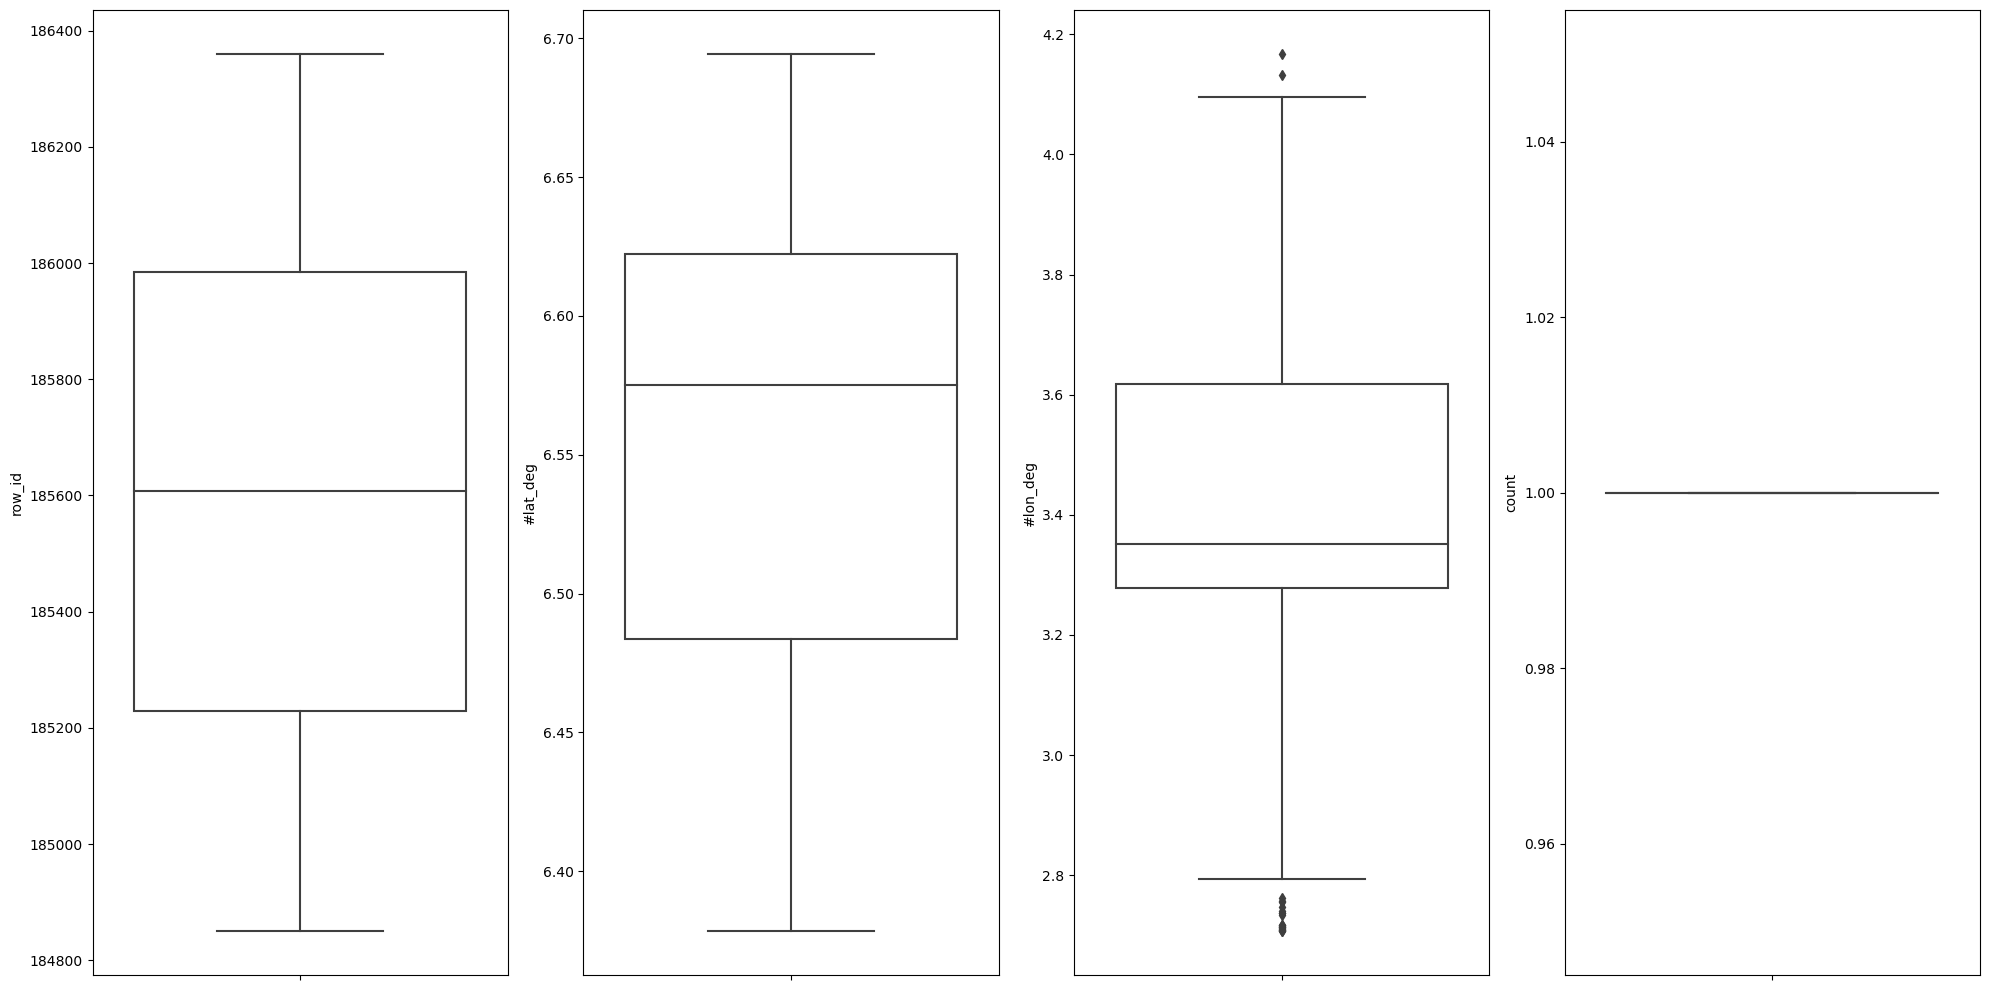


To check pairwise joint distribution of numeric data


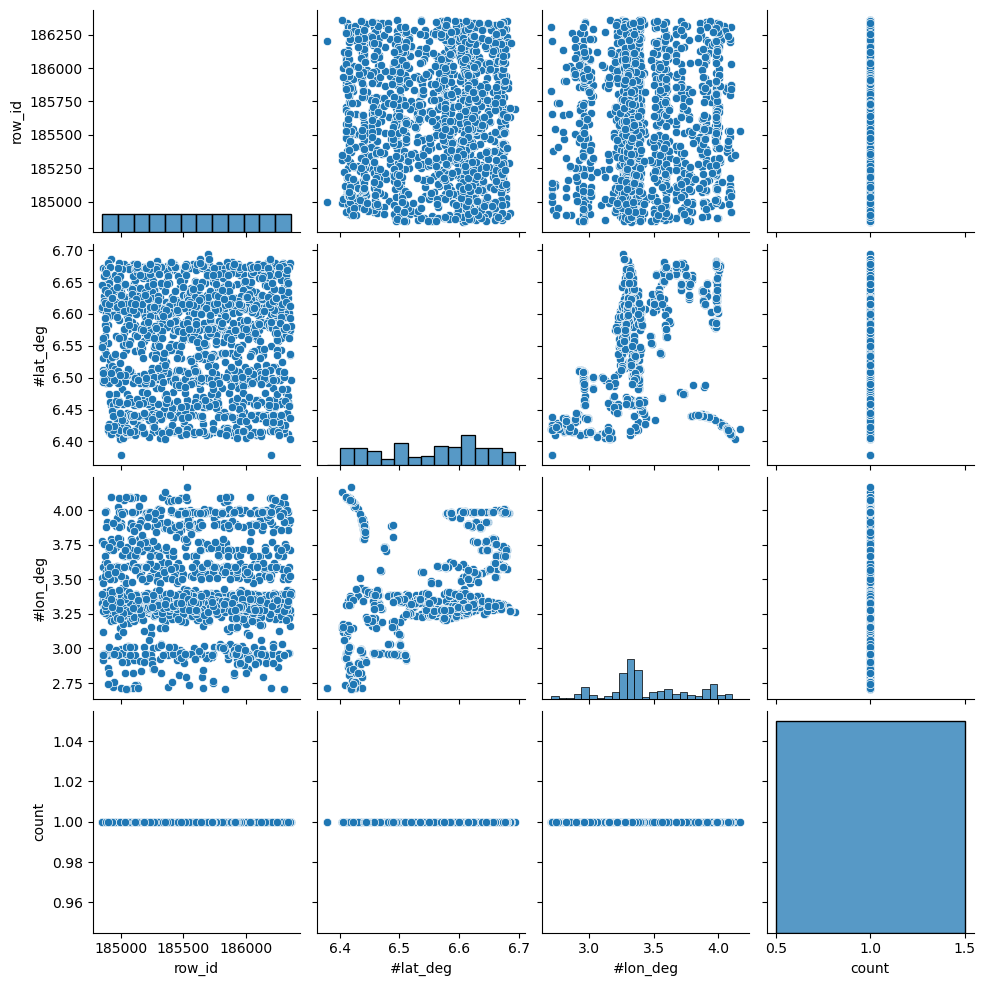

In [7]:
numeric_eda(lagos_working)

In [8]:
categorical_eda(lagos_working)


To check: 
Unique count of non-numeric data

#source                     1
#status_id                  2
#water_source               3
#water_source_clean         3
#water_tech_clean           4
#water_tech                21
#facility_type              1
#adm2                      19
#management                 7
#pay                        4
#status                    35
#subjective_quality         4
#notes                   1156
#photo_lnk               1459
water_tech_original         8
water_source_original       5
management_clean            7
management_original         7
water_source_category       2
water_tech_category         3
dtype: int64
Top 5 unique values of #source
                                        #source  Count
0  Federal Ministry of Water Resources, Nigeria   1506
 
Top 5 unique values of #status_id
  #status_id  Count
0        Yes    991
1         No    515
 
Top 5 unique values of #water_source
                    #water_source  Count
0  Improved Tube well or

In [9]:
top5(lagos_working)

Top 5 unique values of #source
                                        #source  Count
0  Federal Ministry of Water Resources, Nigeria   1506
 
Top 5 unique values of #status_id
  #status_id  Count
0        Yes    991
1         No    515
 
Top 5 unique values of #water_source
                    #water_source  Count
0  Improved Tube well or borehole   1330
1       Improved Protected spring     93
2     Improved Protected dug well     83
 
Top 5 unique values of #water_source_clean
      #water_source_clean  Count
0                Borehole   1295
1        Protected Spring    132
2  Protected Shallow Well     79
 
Top 5 unique values of #water_tech_clean
         #water_tech_clean  Count
0          Mechanized Pump   1287
1                Hand Pump    134
2                 Tapstand     23
3  Mechanized Pump - Solar     10
 
Top 5 unique values of #water_tech
  #water_tech  Count
0   Motorised   1286
1   Hand pump    108
2     Gravity     41
3      Manual     25
4         Tap     16
 
Top 5


To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


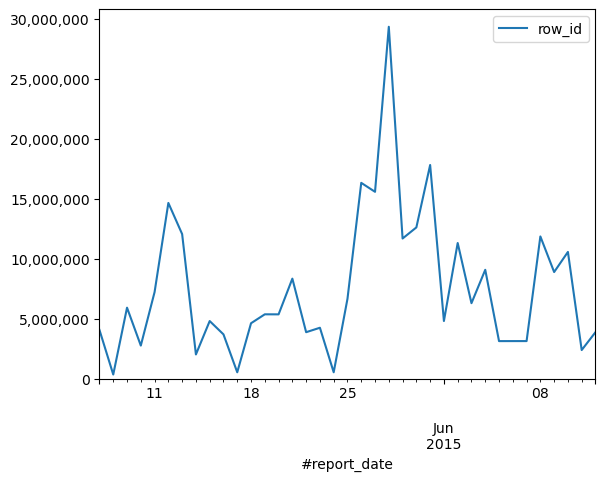

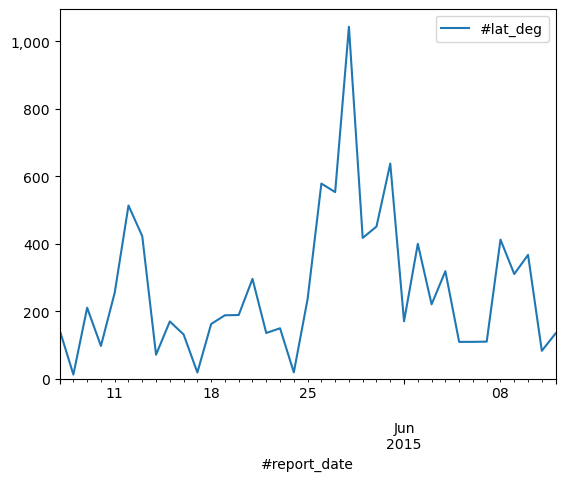

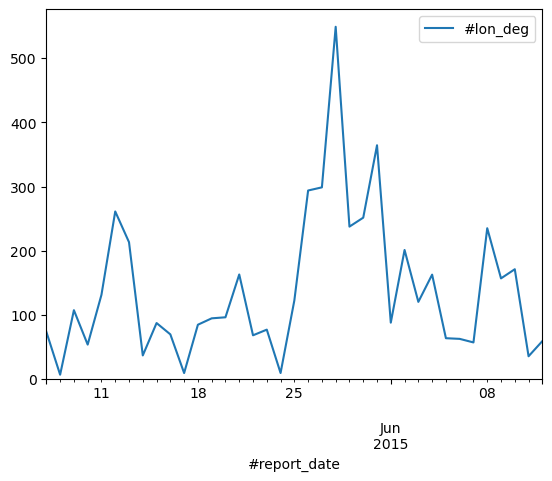

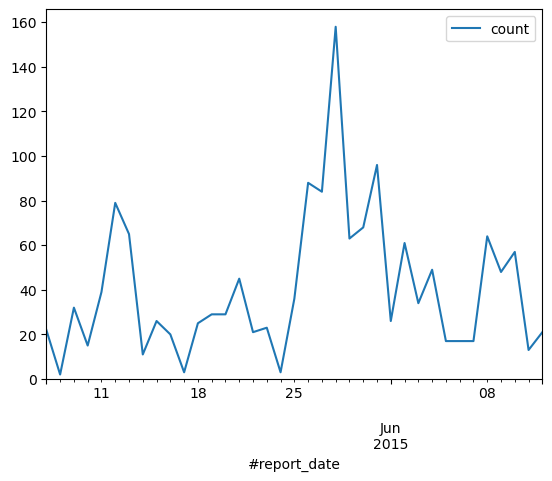

Plotting monthly data


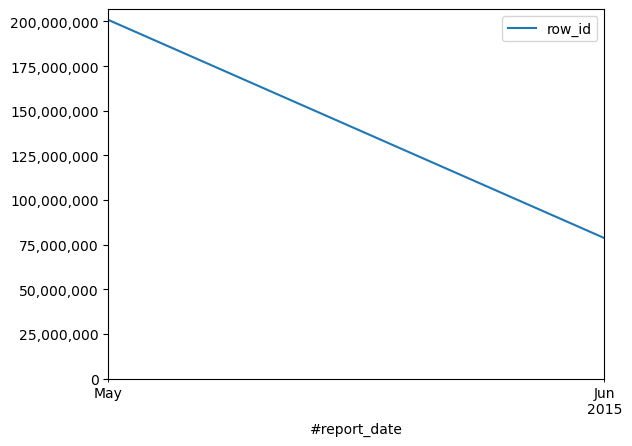

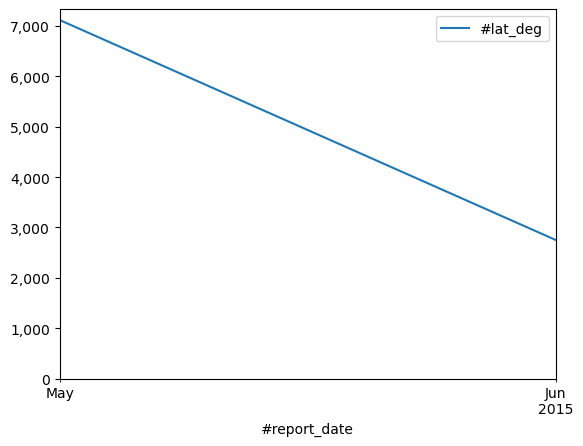

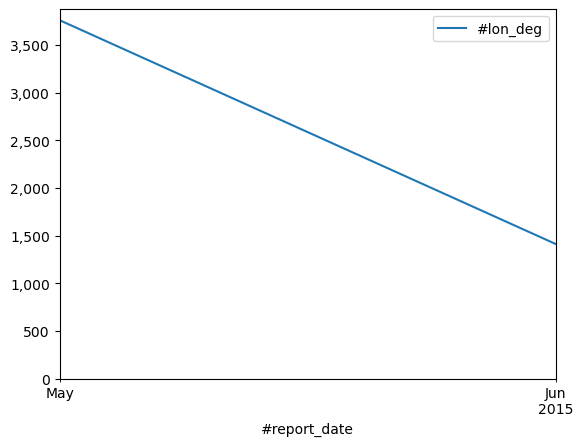

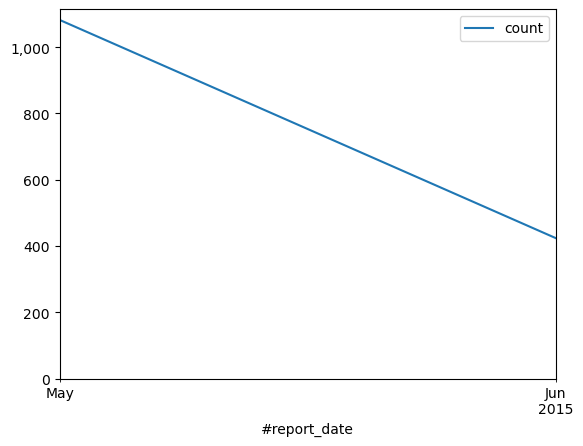

Plotting yearly data


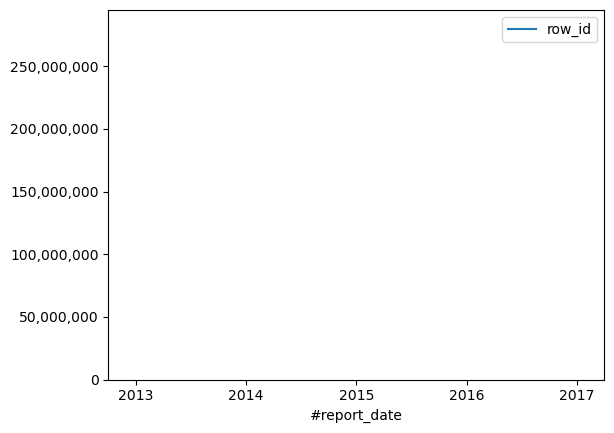

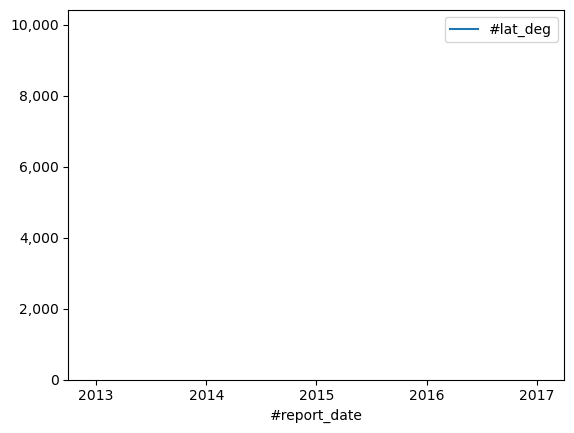

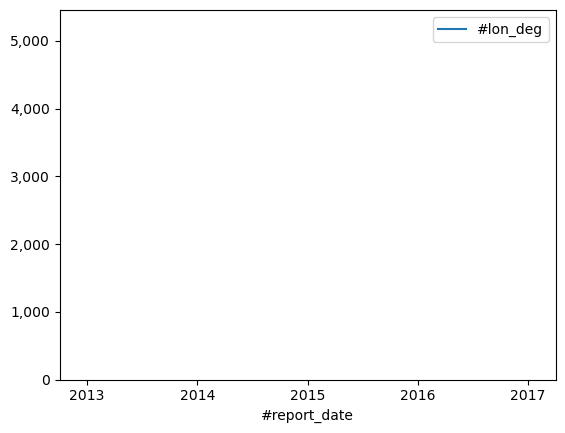

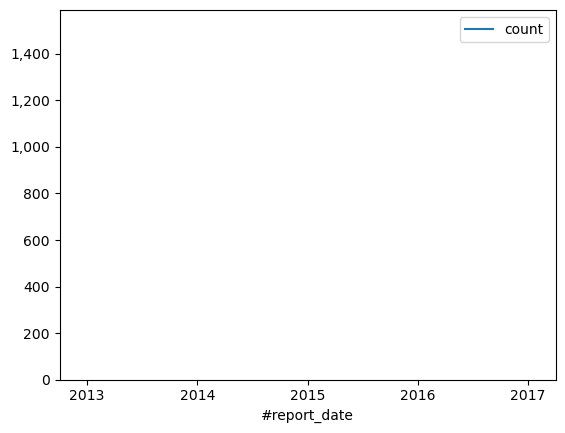

In [10]:
time_series_plot(lagos_working)